<a href="https://colab.research.google.com/github/zhuofachen/toolbox/blob/main/Plot_figures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import itertools
import matplotlib.pyplot as plt  
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
import os
import pandas as pd

def plot_confusion_matrix(cm, labels_name, title, acc):
    cm = cm / cm.sum(axis=1)[:, np.newaxis] 
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, "{:0.2f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    
    im = plt.imshow(cm, interpolation='nearest', cmap = 'Blues')  
    plt.title(title)  
    plt.colorbar(im)
    num_class = np.array(range(len(labels_name)))  
    plt.xticks(num_class, labels_name, rotation=90)  
    
    plt.yticks(num_class, labels_name)  
    plt.ylabel('Target')
    plt.xlabel('Prediction')
    plt.imshow(cm, interpolation='nearest', cmap=plt.get_cmap('Blues'))
    # plt.tight_layout()
    plt.rcParams.update({'font.size': 15})
    
    plt.savefig('confuseMatrix0505.png', bbox_inches='tight') 
    plt.show()




# plt.figure()
# ax = plt.gca()
# im = ax.imshow(np.arange(100).reshape((10,10)))

# # create an axes on the right side of ax. The width of cax will be 5%
# # of ax and the padding between cax and ax will be fixed at 0.05 inch.
# divider = make_axes_locatable(ax)
# cax = divider.append_axes("right", size="5%", pad=0.05)



In [ ]:
label_names = ['Anger', 'Disgust', 'Fear', 'Happiness', 'Sadness', 'Surprise', 'Neutrality']

confuse_mat = []
confuse_mat = pd.read_excel('conf_matrix0505.xlsx', header = None)
confuse_mat = np.array(confuse_mat)
print(confuse_mat)
plt.figure(figsize = (10, 10))
plot_confusion_matrix(confuse_mat, label_names, 'Confusion Matrix', 73.3)


FileNotFoundError: ignored

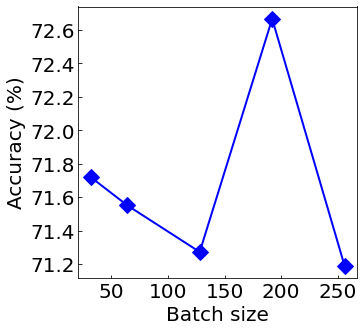

In [ ]:
# evalute results of different optimized models
batch_size = [32, 64, 128, 192, 256]
colors = ['chocolate',  'goldenrod', 'olivedrab', 'royalblue',]
accuracy = [71.7191, 71.5520,  71.2733, 72.6665, 71.1897]
plt.figure(figsize = (5, 5))
plt.plot(batch_size, accuracy, marker='D', color='blue', linewidth=2, markersize=12)
plt.xlabel('Batch size')
plt.ylabel('Accuracy (%)')
plt.rcParams.update({'font.size': 15})
plt.tick_params(direction='in')
plt.show()



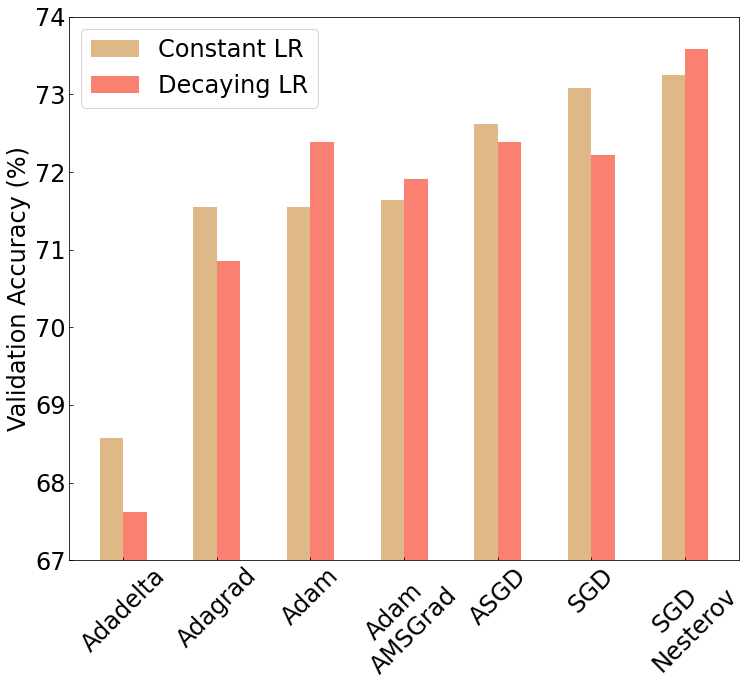

In [ ]:
# confuse_mat = pd.read_excel('comparison of different optimizers.xlsx', header = None)
# confuse_mat = np.array(confuse_mat)
# print(confuse_mat)
# ydata = confuse_mat[:][1]


acc_consLR = [68.571, 71.552, 71.552, 71.636, 72.611, 73.084, 73.252]
acc_decayLR = [67.623, 70.855, 72.389, 71.914, 72.388, 72.221, 73.586]
# optimizers = ['ASGD', 'SGD', 'SGD\nNestrov', 'Adadelta', 'Adagrad', 'Aam', 'Adam\nAMSGrad']

optimizers = ['Adadelta', 'Adagrad', 'Adam', 'Adam\nAMSGrad', 'ASGD', 'SGD', 'SGD\nNesterov']




w = 0.5
xdata = 2 * np.arange(len(optimizers))

plt.figure(figsize = (12, 10))
plt.bar(xdata - w/2, acc_consLR, width=w, color='burlywood', label = 'Constant LR', align = 'center')
plt.bar(xdata + w/2 , acc_decayLR, width=w, color='salmon', label = 'Decaying LR', align = 'center')
plt.xticks(xdata, optimizers)
# plt.xlabel('Optimizer')
plt.ylabel('Validation Accuracy (%)')
plt.legend()


plt.ylim([67, 74])
plt.rcParams.update({'font.size': 24})
plt.xticks(rotation=45)
plt.tick_params(direction='in')
plt.savefig('Optimizer comparison0505.png', bbox_inches='tight')
plt.show()



[(73.25, 71.273, 'Constant'), (73.084, 71.97, 'StepLR'), (72.36, 71.078, 'OneCycleLR'), (73.363, 72.36, 'CosineWR'), (73.586, 73.057, 'RLRP'), (73.335, 71.942, 'Cosine')]
[(72.36, 71.078, 'OneCycleLR'), (73.084, 71.97, 'StepLR'), (73.25, 71.273, 'Constant'), (73.335, 71.942, 'Cosine'), (73.363, 72.36, 'CosineWR'), (73.586, 73.057, 'RLRP')]


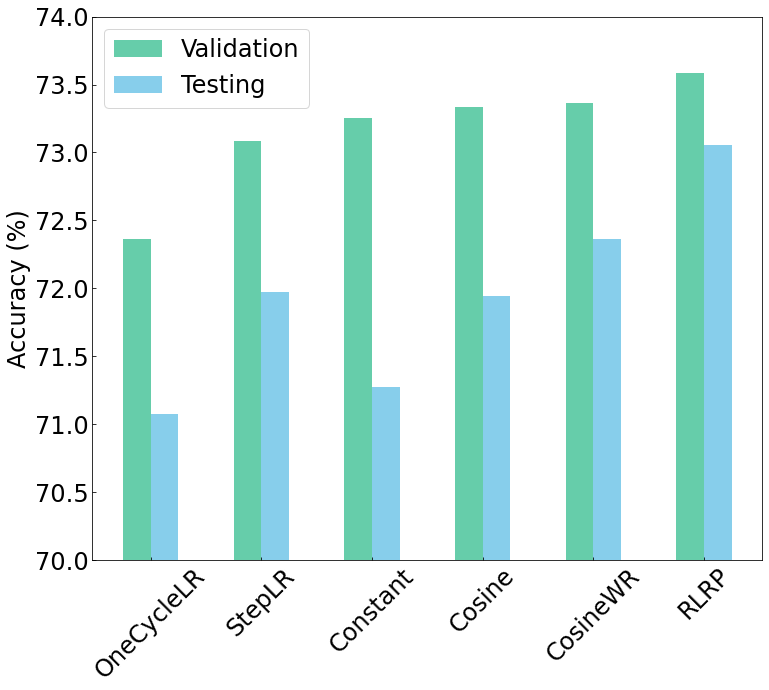

In [ ]:
#         learning rate   validation   test
#            0.01.          72.36       71.08
#             0.001         72.471      71.0226
#            0.0001         71.496      70.159
#             


# acc_val = [73.307, 73.586, 73.67, 74.06, 73.586, 74.255]
# acc_test = [71.858, 70.27, 72.36, 72.081, 73.056, 72.221]
Schedule = ['Constant', 'StepLR', 'OneCycleLR', 'CosineWR', 'RLRP', 'Cosine']

# acc_val = [72.471,   73.084, 72.36,  73.363, 73.586, 72.026]
# acc_test = [71.0226, 71.970, 71.078, 72.360, 73.057, 70.215]

acc_val = [73.25,   73.084, 72.36,  73.363, 73.586, 73.335]
acc_test = [71.273, 71.970, 71.078, 72.360, 73.057, 71.942]

tups = [(a,b, c) for (a, b), c in zip(zip(acc_val, acc_test), Schedule)]
print(tups)
tup_sort = sorted(tups, reverse = False)
print(tup_sort)

acc_val_sort, acc_test_sort, schedule_sort = [], [], []
for a, b, c in tup_sort:
  acc_val_sort.append(a)
  acc_test_sort.append(b)
  schedule_sort.append(c)

w = 0.5
xdata = 2 * np.arange(len(Schedule))
plt.figure(figsize = (12, 10))
plt.bar(xdata - w/2, acc_val_sort, width=w, color='mediumaquamarine', label = 'Validation', align = 'center')
plt.bar(xdata + w/2 , acc_test_sort, width=w, color='skyblue', label = 'Testing', align = 'center')
plt.xticks(xdata, schedule_sort)
# plt.xlabel('Learning rate schedules')
plt.ylabel('Accuracy (%)')
plt.ylim([70, 74])
plt.rcParams.update({'font.size': 24})
plt.tick_params(direction='in')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.savefig('schedules comparison0505.png',  bbox_inches='tight')


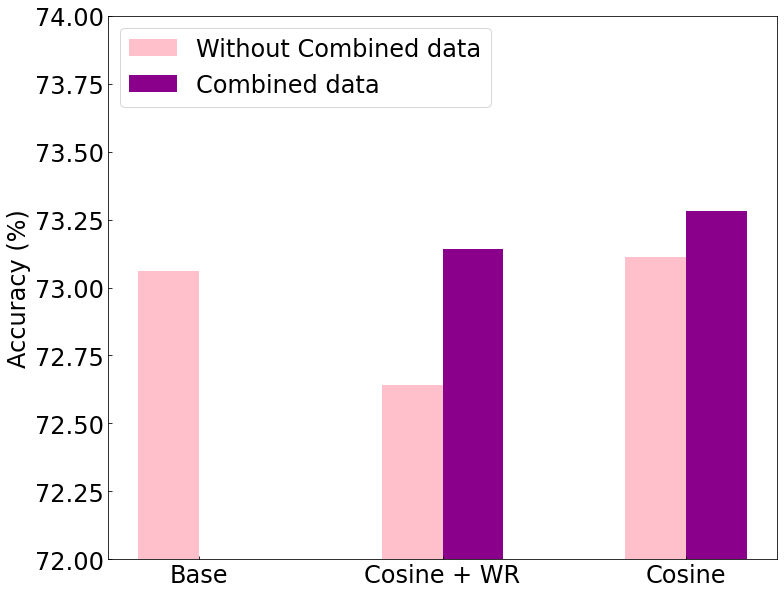

In [ ]:


acc_no_combine = [73.06, 72.64, 73.112] 
acc_combine = [0, 73.14, 73.28]

no_combine = ['Base', 'Cosine + WR',  'Cosine']
# combine = ['Cosine + WR \n + Combined data',  'Cosine\n + Combined data']


w = 0.5
xdata = 2 * np.arange(len(acc_no_combine))
plt.figure(figsize = (12, 10))
plt.bar(xdata - w/2, acc_no_combine, width=w, color='pink', label = 'Without Combined data', align = 'center')
plt.bar(xdata + w/2 , acc_combine, width=w, color='darkmagenta', label = 'Combined data', align = 'center')
plt.xticks(xdata, no_combine)
# plt.xlabel('Learning rate schedules')
plt.ylabel('Accuracy (%)')
plt.ylim([72, 74])
plt.rcParams.update({'font.size': 24})
plt.tick_params(direction='in')
plt.legend(loc='upper left')
plt.savefig('extra tuning.png',  bbox_inches='tight')